In [2]:
# import modules
import pandas as pd
pd.set_option('display.max_columns', 20)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv("Churn_Modelling.csv")
display(df)


# Wyłączenie notacji naukowej dla liczb zmiennoprzecinkowych
#pd.options.display.float_format = '{:,.0f}'.format
pd.reset_option('display.float_format')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#delete unnecessary column
df = df.drop('RowNumber', axis=1)

In [4]:
#check for datatypes
display(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# changing data types
df['CustomerId'] = df['CustomerId'].astype('string')
df['Surname'] = df['Surname'].astype('string')
df['Geography'] = df['Geography'].map({'Spain':1,'France':2,'Germany':3,})
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Geography'] = pd.to_numeric(df['Geography'], downcast='integer')
df['Gender'] = pd.to_numeric(df['Gender'], downcast='integer')

display(df.dtypes)

CustomerId         string[python]
Surname            string[python]
CreditScore                 int64
Geography                    int8
Gender                       int8
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                   int64
IsActiveMember              int64
EstimatedSalary           float64
Exited                      int64
dtype: object

In [6]:
# read statistics
display(df.describe().round(2))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,2.00,0.45,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,0.71,0.50,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,1.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,2.00,0.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,2.00,0.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,3.00,1.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,3.00,1.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [7]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# unique_counts = df.nunique()
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [9]:
# columnes with few unique values

column_with_few_unique_values = [
    'Geography',
    'Gender',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'Exited',
    ]

# examine unique values
for column in column_with_few_unique_values:
    # count of unique values
    display(df[column].value_counts())
        
    # % of unique values
    #display(pd.crosstab(index=df[column], columns='count', normalize='columns'))
        
    print('-' * 40)  # separator

Geography
2    5014
3    2509
1    2477
Name: count, dtype: int64

----------------------------------------


Gender
0    5457
1    4543
Name: count, dtype: int64

----------------------------------------


Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

----------------------------------------


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

----------------------------------------


HasCrCard
1    7055
0    2945
Name: count, dtype: int64

----------------------------------------


IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

----------------------------------------


Exited
0    7963
1    2037
Name: count, dtype: int64

----------------------------------------


Conclusions:

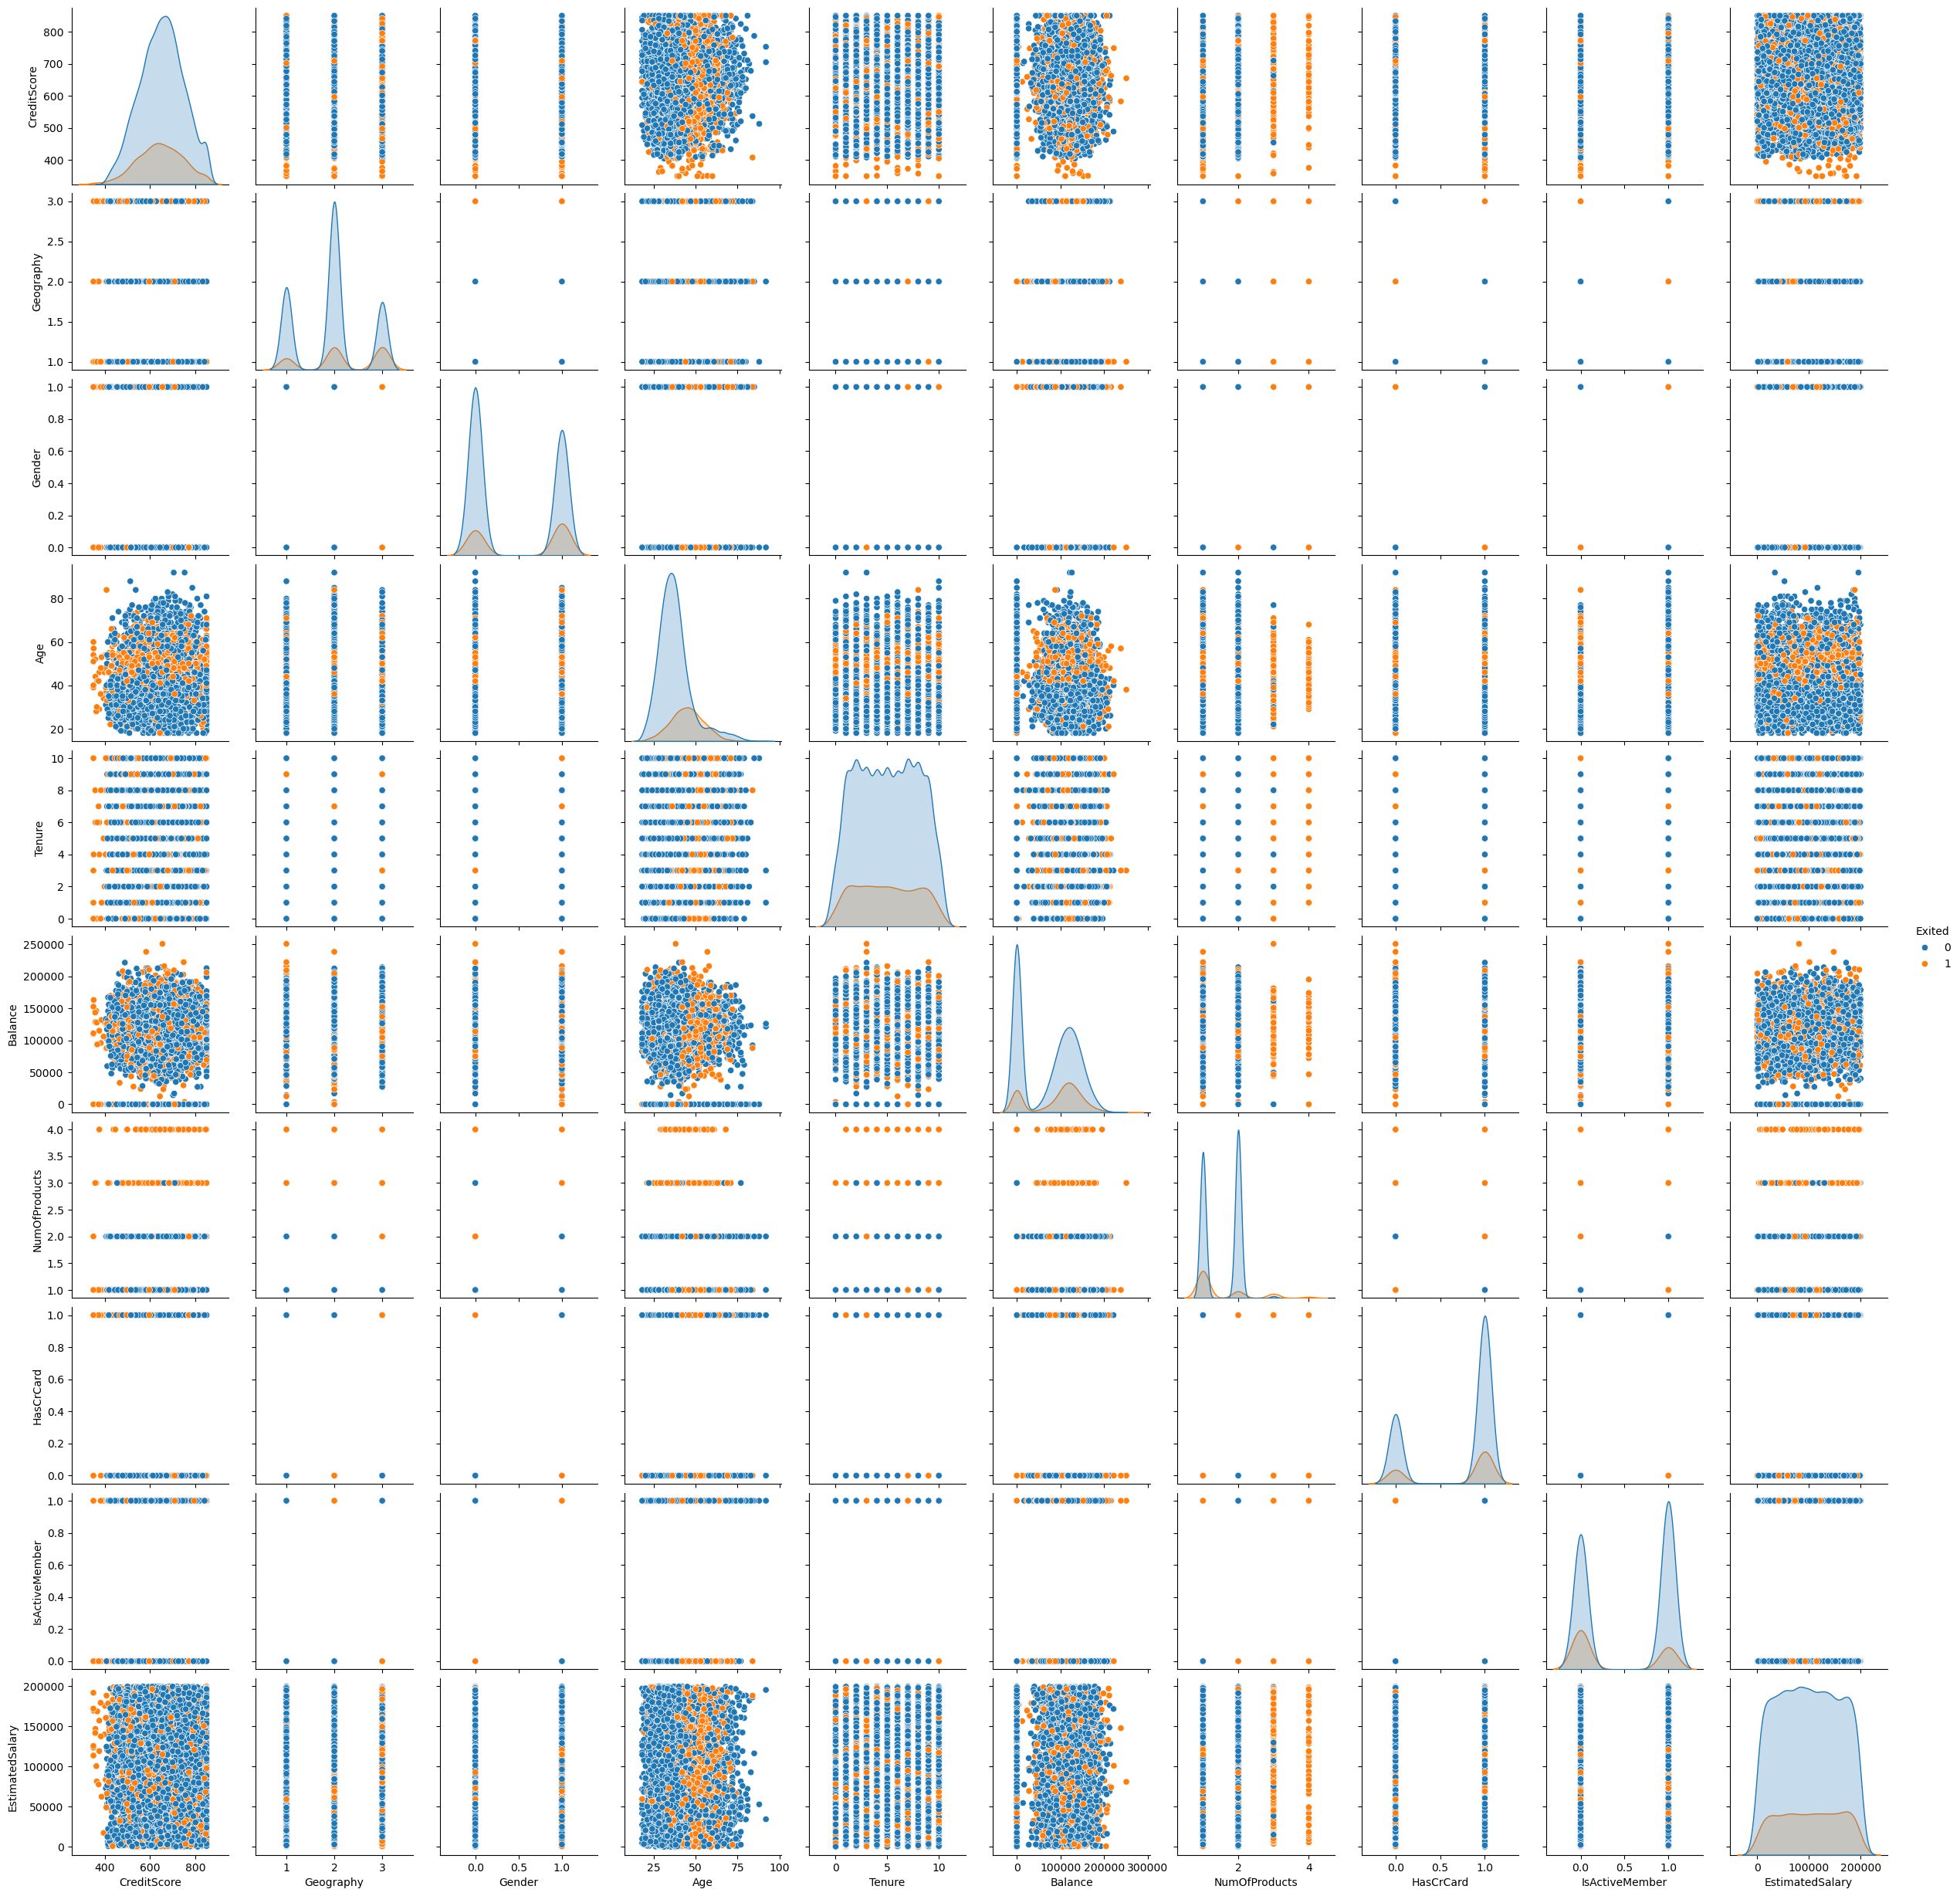

In [10]:
# distribution of numerical values
display(sns.pairplot(df, hue = 'Exited'))

Conclusions:
    After first glance the churn is mostly to see for:
    - Age between 40 and 60
    - NumOfProducts of 3 and more
    - CreditScore of less than 400
    - German customers        

#corelated fetures

<Axes: >

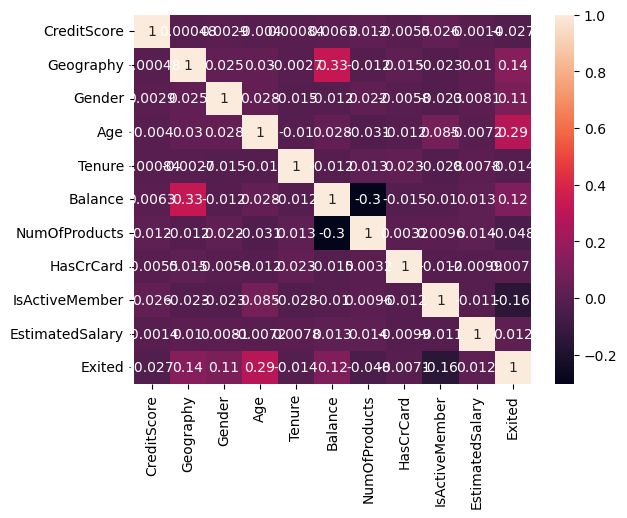

In [11]:
#corelated fetures
# Wybieramy tylko kolumny numeryczne
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Obliczamy korelację tylko na danych numerycznych
sns.heatmap(numerical_df.corr(), annot=True)

In [ ]:
numerical_df.corr().round(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,0.00,0.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Geography,0.00,1.00,0.03,0.03,-0.00,0.33,-0.01,0.01,-0.02,0.01,0.14
Gender,0.00,0.03,1.00,0.03,-0.01,-0.01,0.02,-0.01,-0.02,0.01,0.11
Age,-0.00,0.03,0.03,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,-0.00,-0.01,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.33,-0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,-0.01,0.02,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,0.01,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,-0.02,-0.02,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


The correlations between are not significant. The highest is 0.33 between Balance and Geography. Similar correlated are  Age,  Exited NumOfProducts and Balance.
It is probably due to the fact that they are synthetic data.

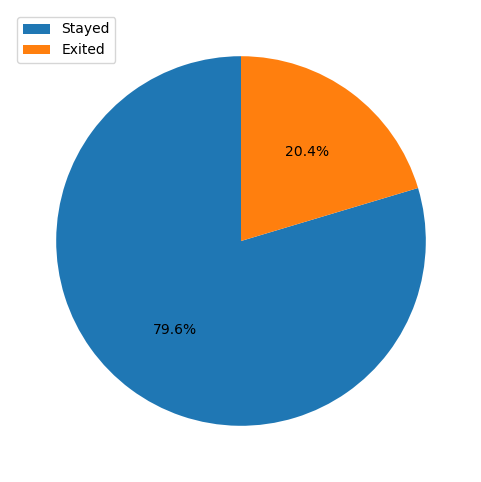

In [24]:
# checking if target categories are balanced
# pie chart of Exited

# data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count'] # transform the crosstab into a simple series for the pie chart
labels = ['Stayed', 'Exited']  # 0: Stayed, 1: Exited
#display(crosstab)

# chart
plt.figure(figsize=(6, 6))
plt.pie(pie_data, autopct='%1.1f%%', startangle=90)
# plt.title('Exited among all cars')
plt.legend(labels, loc="upper left")
plt.show()